In [22]:
import numpy as np
import pandas as pd

#Importando dataset y creando DF con el index
data_path = "../data/iris/iris.data"

df = pd.read_csv(data_path, header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df

#Creando funciones para calcular distancias

# Función para calcular la distancia de Manhattan
def distancia_manhattan(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

# Función para calcular la distancia euclidiana
def distancia_euclidiana(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


In [23]:
#Creando promedios para cada clase
mean_df = df.groupby("class").mean()
mean_df

#Creando tuplas con largo y ancho para sepalo y petalo de cada clase
sepalos = [(mean_df.loc[i, "sepal_length"], mean_df.loc[i, "sepal_width"], i) for i in mean_df.index]
petalos = [(mean_df.loc[i, "petal_length"], mean_df.loc[i, "petal_width"], i) for i in mean_df.index]
print(sepalos, petalos)

[(5.006, 3.418, 'Iris-setosa'), (5.936, 2.77, 'Iris-versicolor'), (6.587999999999999, 2.9739999999999998, 'Iris-virginica')] [(1.464, 0.24400000000000002, 'Iris-setosa'), (4.26, 1.3259999999999998, 'Iris-versicolor'), (5.5520000000000005, 2.026, 'Iris-virginica')]


[2.796, 1.0819999999999999, 1.2920000000000007, 0.7, 4.088000000000001, 1.7819999999999998]


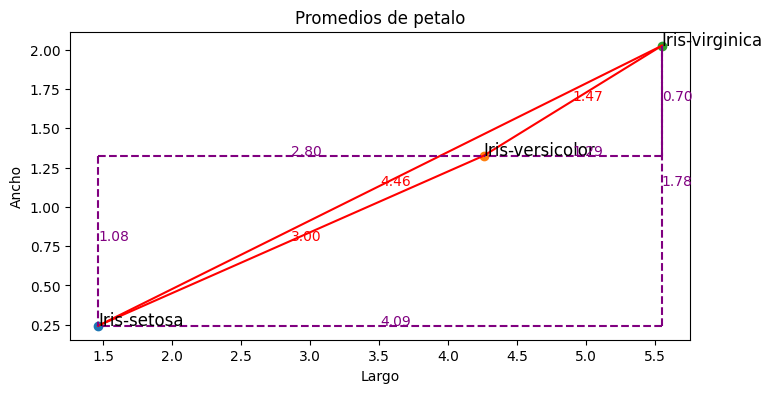

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Graficando promedios de petalo
plt.figure(figsize=(8, 4))
plt.xlabel("Largo")
plt.ylabel("Ancho")
plt.title("Promedios de petalo")

# Graficar y etiquetar petalos
for petalo in petalos:
    plt.scatter(petalo[0], petalo[1], label=petalo[2])
    plt.text(petalo[0], petalo[1], petalo[2], fontsize=12)

petalos_x = [petalo[0] for petalo in petalos]
petalos_y = [petalo[1] for petalo in petalos]

# Graficando distancias euclidianas
plt.plot(petalos_x, petalos_y, color="red")
plt.plot(petalos_x[0:3:2], petalos_y[0:3:2], color="red")

# Calcular distancias euclidianas
distancias_euclidiana = [
    distancia_euclidiana((petalos_x[i], petalos_y[i]), (petalos_x[j], petalos_y[j]))
    for i, j in [(0, 1), (0, 2), (1, 2)]
]

# Etiquetar distancias euclidianas en las hipotenusas
hipotenusas = [
    [(petalos_x[i], petalos_x[j]), (petalos_y[i], petalos_y[j])]
    for i, j in [(0, 1), (0, 2), (1, 2)]
]

for i, hipotenusa in enumerate(hipotenusas):
    mid_x = (hipotenusa[0][0] + hipotenusa[0][1]) / 2
    mid_y = (hipotenusa[1][0] + hipotenusa[1][1]) / 2
    plt.text(mid_x, mid_y, f'{distancias_euclidiana[i]:.2f}', color="red", fontsize=10)


cordenadas = [(0, 1, 1, 1), (0, 0, 1, 0), (2, 1, 1, 1), (2, 2, 1, 2), (2, 0, 0, 0), (2, 2, 0, 2)]
# Graficando distancias de Manhattan
lineas = [
    [(petalos_x[i], petalos_x[j]), (petalos_y[k], petalos_y[l])]
    for (i, j, k, l) in cordenadas
]

distancias = [np.abs(petalos_x[i] - petalos_x[j]) + np.abs(petalos_y[k] - petalos_y[l]) for (i, j, k, l) in cordenadas]    

# Dibujar líneas de Manhattan y agregar etiquetas de distancia
for i, linea in enumerate(lineas):
    plt.plot(linea[0], linea[1], color="purple", linestyle="--")
    mid_x = (linea[0][0] + linea[0][1]) / 2
    mid_y = (linea[1][0] + linea[1][1]) / 2
    plt.text(mid_x, mid_y, f'{distancias[i]:.2f}', color="purple", fontsize=10)


print(distancias)
plt.show()


[0.9299999999999997, 0.6480000000000001, 0.6519999999999992, 0.20399999999999974, 1.581999999999999, 0.4440000000000004]


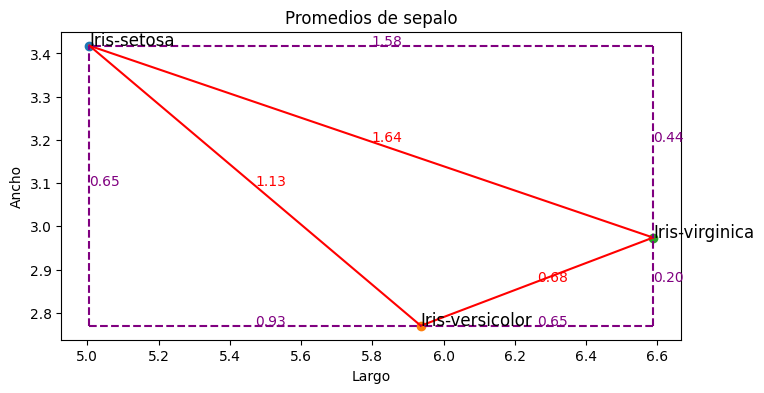

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Graficando promedios de sepalo
plt.figure(figsize=(8, 4))
plt.xlabel("Largo")
plt.ylabel("Ancho")
plt.title("Promedios de sepalo")

# Graficar y etiquetar sepalos
for sepalo in sepalos:
    plt.scatter(sepalo[0], sepalo[1], label=sepalo[2])
    plt.text(sepalo[0], sepalo[1], sepalo[2], fontsize=12)

sepalos_x = [sepalo[0] for sepalo in sepalos]
sepalos_y = [sepalo[1] for sepalo in sepalos]

# Graficando distancias euclidianas
plt.plot(sepalos_x, sepalos_y, color="red")
plt.plot(sepalos_x[0:3:2], sepalos_y[0:3:2], color="red")

# Calcular distancias euclidianas
distancias_euclidiana = [
    distancia_euclidiana((sepalos_x[i], sepalos_y[i]), (sepalos_x[j], sepalos_y[j]))
    for i, j in [(0, 1), (0, 2), (1, 2)]
]

# Etiquetar distancias euclidianas en las hipotenusas
hipotenusas = [
    [(sepalos_x[i], sepalos_x[j]), (sepalos_y[i], sepalos_y[j])]
    for i, j in [(0, 1), (0, 2), (1, 2)]
]

for i, hipotenusa in enumerate(hipotenusas):
    mid_x = (hipotenusa[0][0] + hipotenusa[0][1]) / 2
    mid_y = (hipotenusa[1][0] + hipotenusa[1][1]) / 2
    plt.text(mid_x, mid_y, f'{distancias_euclidiana[i]:.2f}', color="red", fontsize=10)

cordenadas = [(0, 1, 1, 1), (0, 0, 1, 0), (2, 1, 1, 1), (2, 2, 1, 2), (2, 0, 0, 0), (2, 2, 0, 2)]
# Graficando catetos (componentes de la distancia de Manhattan)
lineas = [
    [(sepalos_x[i], sepalos_x[j]), (sepalos_y[k], sepalos_y[l])]
    for (i, j, k, l) in cordenadas
]

distancias = [abs(sepalos_x[i] - sepalos_x[j]) + abs(sepalos_y[k] - sepalos_y[l]) for (i, j, k, l) in cordenadas]

# Dibujar líneas de Manhattan y agregar etiquetas de distancia
for i, linea in enumerate(lineas):
    plt.plot(linea[0], linea[1], color="purple", linestyle="--")
    mid_x = (linea[0][0] + linea[0][1]) / 2
    mid_y = (linea[1][0] + linea[1][1]) / 2
    plt.text(mid_x, mid_y, f'{distancias[i]:.2f}', color="purple", fontsize=10)


print(distancias)
plt.show()


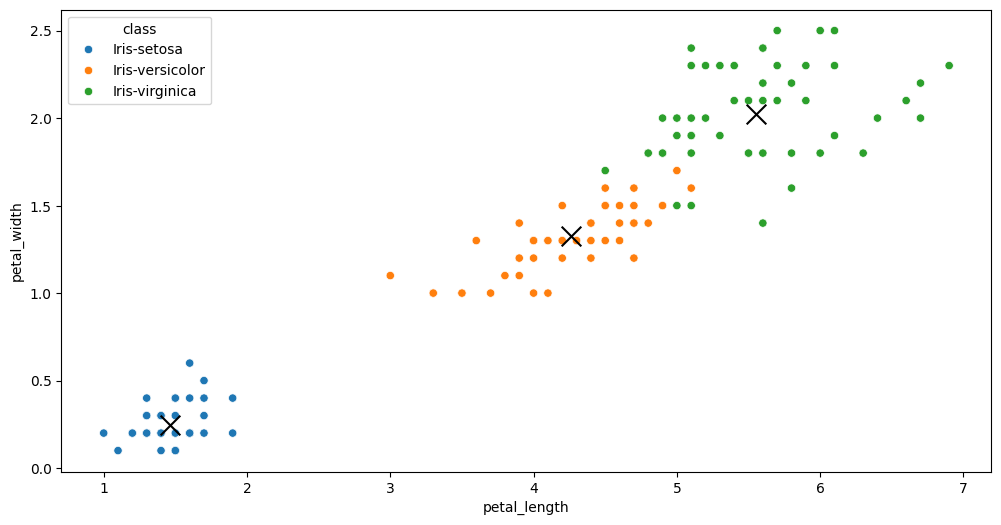

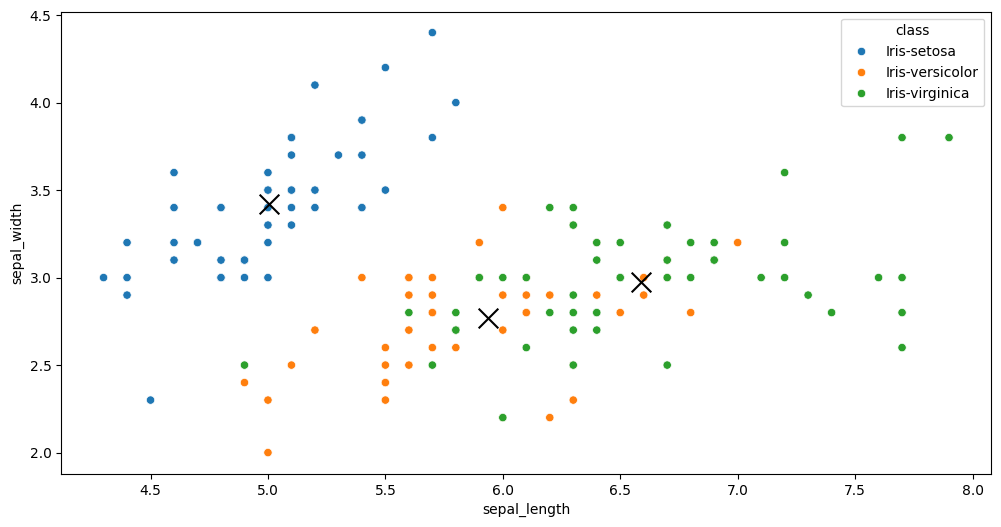

In [30]:
#Graficando los promedios junto a los puntos del dataset}
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x="petal_length", y="petal_width", hue="class", data=df)
plt.scatter(petalos_x, petalos_y, s=200, c="black", marker="x")
plt.show()


plt.figure(figsize=(12, 6))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="class", data=df)
plt.scatter(sepalos_x, sepalos_y, s=200, c="black", marker="x")